In [44]:
# Dùng thư viện yfinance để tải dataset
import yfinance as yf

start_date = '2017-12-01'
end_date = '2023-06-10'
symbol = 'AMZN' #  Apple Inc.

data = yf.download(symbol, start=start_date, end=end_date)
data.to_csv('AMZN_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


In [45]:
# Xem data
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,58.602501,58.982498,57.599998,58.117500,58.117500,82142000
2017-12-04,58.692501,58.759998,56.400002,56.697498,56.697498,118638000
2017-12-05,56.412998,57.963501,56.237000,57.078499,57.078499,81596000
2017-12-06,56.899502,57.794498,56.804001,57.617500,57.617500,57066000
2017-12-07,57.829498,58.159500,57.549999,57.989498,57.989498,50232000
...,...,...,...,...,...,...
2023-06-05,123.360001,125.800003,123.029999,125.300003,125.300003,47950100
2023-06-06,125.070000,127.400002,125.000000,126.610001,126.610001,45695200
2023-06-07,127.010002,127.370003,120.629997,121.230003,121.230003,95663300


In [46]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [47]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('AMZN_stock_data.csv')
df = df[['Open']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [48]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Open'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4465.077, Time=1.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4468.752, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4467.206, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4466.941, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4468.675, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4467.321, Time=1.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4467.346, Time=2.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4467.121, Time=2.80 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4467.119, Time=3.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4466.063, Time=1.97 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4466.036, Time=3.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4466.375, Time=3.88 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4469.123, Time=3.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4466.313, Time=1.53 sec

Best model:  ARIMA(2,1,2)(0,0,0)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [50]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Open'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Open'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [51]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted opening prices for the next 30 days:')
print(y_next_30_days)

Predicted opening prices for the next 30 days:
[163.08468052 163.42950356 163.62250823 163.92483133 164.08642993
 164.35553242 164.49357896 164.7366149  164.85711413 165.07960408
 165.18714182 165.39335059 165.49142421 165.68465099 165.77592307
 165.95872438 166.04521752 166.21957839 166.30282476 166.47029034
 166.55144647 166.71322304 166.79315794 166.95019066 167.02955342
 167.182586   167.26185772 167.41147829 167.49101185 167.63768829]


In [52]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 72.61110032580896
Testing RMSE: 51.741907992774266


In [53]:
y_pred_val

array([163.08468052, 163.42950356, 163.62250823, 163.92483133,
       164.08642993, 164.35553242, 164.49357896, 164.7366149 ,
       164.85711413, 165.07960408, 165.18714182, 165.39335059,
       165.49142421, 165.68465099, 165.77592307, 165.95872438,
       166.04521752, 166.21957839, 166.30282476, 166.47029034,
       166.55144647, 166.71322304, 166.79315794, 166.95019066,
       167.02955342, 167.182586  , 167.26185772, 167.41147829,
       167.49101185, 167.63768829, 167.71773891, 167.86184594,
       167.94259458, 168.08443467, 168.16600599, 168.30582539,
       168.38830148, 168.52630265, 168.60973355, 168.74608463,
       168.83049642, 168.96533862, 169.05073952, 169.18419281,
       169.27057791, 169.40274535, 169.49010021, 169.6210714 ,
       169.70937473, 169.83922841, 169.92845416, 170.05726027,
       170.14737921, 170.27520047, 170.36618135, 170.49307452,
       170.58488497, 170.7109018 , 170.80350898, 170.92869702,
       171.02206809, 171.14647126, 171.2405738 , 171.36

In [54]:
y_val

array([ 95.37000275,  95.94999695,  93.97000122,  92.62000275,
        93.23999786,  93.79000092,  93.93000031,  94.04000092,
        92.47000122,  96.98999786,  94.48000336,  93.05000305,
        90.5       ,  88.33999634,  89.23999786,  88.90000153,
        89.20999908,  95.23000336,  92.5       ,  89.88999939,
        88.26999664,  87.51000214,  85.33000183,  86.18000031,
        85.51999664,  83.25      ,  84.97000122,  82.80000305,
        82.87000275,  83.12000275,  85.45999908,  86.55000305,
        85.33000183,  83.02999878,  87.45999908,  87.56999969,
        90.93000031,  96.93000031,  94.18000031,  98.68000031,
        97.25      ,  94.73999786,  93.86000061,  97.55999756,
        96.93000031,  92.55999756,  98.23999786,  99.52999878,
       101.08999634, 101.16000366, 102.52999878, 110.25      ,
       105.26000214, 102.93000031, 101.16999817, 102.04000092,
       101.31999969,  97.55999756,  97.84999847,  98.41000366,
        99.08999634,  99.20999908,  97.80000305,  95.33

Validation RMSE: 72.61110032580896
Testing RMSE: 51.741907992774266


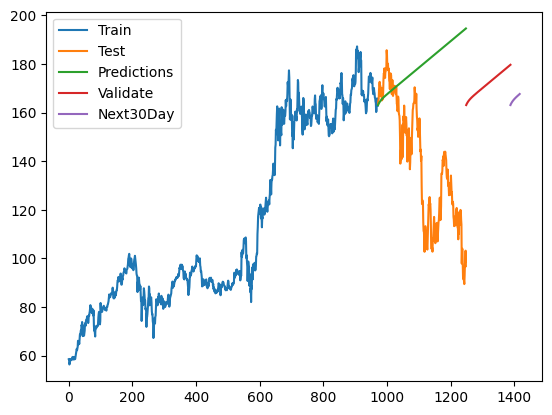

In [55]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Open'])
plt.plot(test_data.index, test_data['Open'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [56]:
test_data.index

RangeIndex(start=972, stop=1249, step=1)